In [3]:
#libraries
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# model - simple tank with heater
def temp(te,t,tin,q,m,cp):
    dTdt = tin - te + q/(m*cp)
    return dTdt

In [17]:
# heater model parameters
t = np.linspace(0,200,1000)
q = 1000
m = 10.0
cp = 4.1
tin = 293.15
te0 = 293.15
te = np.ones(len(t))
te[0] = te0

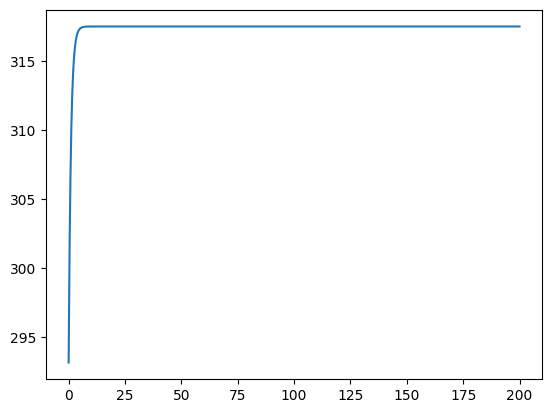

In [18]:
# testing ODE
ans = odeint(temp,te0,t,args=(tin,q,m,cp,))
plt.plot(t, ans)

In [13]:
# controller parameters
error = np.zeros(len(t))
qcontrol = np.ones(len(t))*100
sp = np.ones(len(t))*350
sp[600:] = 340

In [29]:
# tuning parameters for PID
kc = 1.2
taui = 5.0
taud = 5.0

Isum = 0
LastError = 0
Dsum = 0

In [30]:
#integrator
for i in range(len(t)-1):
    ## controller
    error[i] = sp[i] - te0
    Isum = Isum + (kc/taui)*error[i]
    Dsum = (kc/taud)*(error[i]-LastError)
    qcontrol[i] = qcontrol[0] + kc*error[i] + Isum + Dsum
    ##################################################
    tep = odeint(temp,te0,[t[i],t[i+1]],args=(tin,qcontrol[i],m,cp,))
    # print(tep)
    te0 = tep[1]
    te[i+1] = tep[1]
    LastError = error[i]
#print(te)

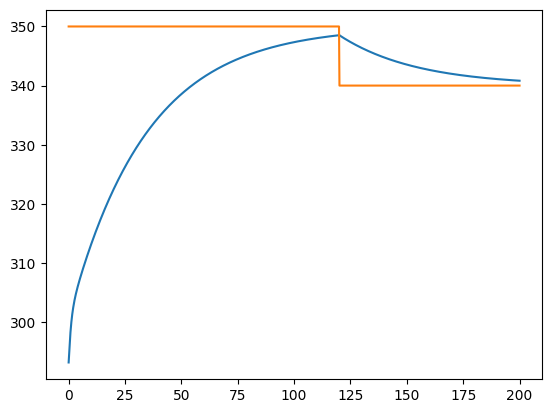

In [31]:
plt.plot(t,te)
plt.plot(t,sp)

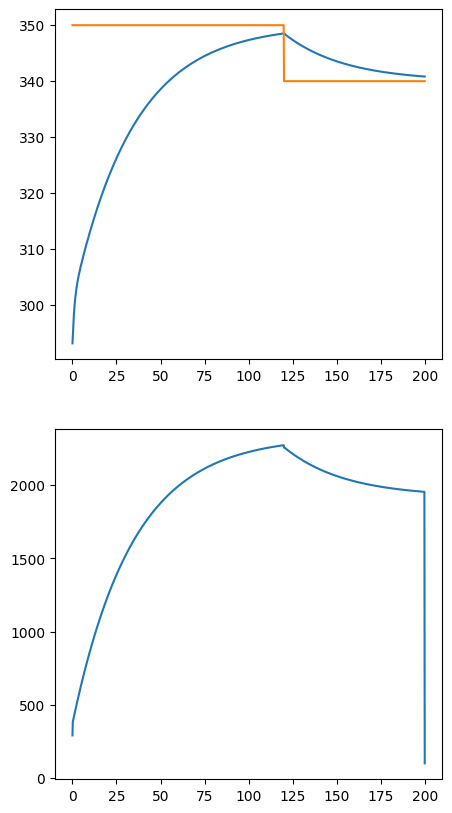

In [32]:
# plot them
fig, ax = plt.subplots(2, figsize=(5,10))
ax[0].plot(t,te)
ax[0].plot(t,sp)
ax[1].plot(t,qcontrol)
#plt.plot(t,qcontrol)
plt.show()

In [ ]:
from scipy.optimize import minimize as mi
from scipy.integrate import trapezoid as tp

In [ ]:
#optimization
def heater(x, plotG):
    # heater model parameters
    t = np.linspace(0,200,1000)
    q = 100.0
    m = 10.0
    cp = 4.1
    tin = 293.15
    te0 = 293.15
    te = np.ones(len(t))
    te[0] = te0

    # controller parameters
    error = np.zeros(len(t))
    qcontrol = np.ones(len(t))*100
    sp = np.ones(len(t))*350
    sp[600:] = 300
    
    # tuning parameters for PID
    kc =   x[0]
    taui = x[1]
    taud = x[2]
    
    Isum = 0
    LastError = 0
    Dsum = 0

    #integrator
    for i in range(len(t)-1):
        ## controller
        error[i] = sp[i] - te0
        Isum = Isum + (kc/taui)*error[i]
        Dsum = (kc/taud)*(error[i]-LastError)
        qcontrol[i] = qcontrol[0] + kc*error[i] + Isum + Dsum
        ##################################################
        tep = odeint(temp,te0,[t[i],t[i+1]],args=(tin,qcontrol[i],m,cp,))
        # print(tep)
        te0 = tep[1]
        te[i+1] = tep[1]
        LastError = error[i]
    #print(te)
    if(plotG):
        # plot them
        plt.plot(t,te)
        plt.plot(t,sp)
        #plt.plot(t,qcontrol)
        plt.show()
    return abs(tp(te,t)-tp(sp,t))

In [ ]:
x0 = [1.2, 5, 5]
bnds = ((0.5, 3), (0.5, 15), (0.5, 10))
plotG = False
# heater(x0, plotG)
res = mi(heater, x0, method='Nelder-Mead', bounds=bnds, tol=1e-5, args=(plotG))

In [ ]:
heater(res.x, True)